# **QUESTION FORMULATION**

---

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Raw Data**

In [2]:
weather_path = "../data/raw/weatherAUS.csv"
df_weather = pd.read_csv(weather_path)

## **Question 4**

### **1. The question**

*Liệu chỉ số tương tác động lực gió, được xây dựng từ sự kết hợp giữa tốc độ gió giật (`WindGustSpeed`) và độ lệch hướng gió trong ngày (`Diurnal Wind Shift`), có thể đóng vai trò như một chỉ báo dự báo mưa ngày kế tiếp (`RainTomorrow`); hay hiệu lực dự báo của tín hiệu động lực này bị điều biến bởi trạng thái nhiệt – ẩm của khí quyển (đặc trưng bởi độ ẩm và nhiệt độ buổi chiều), cũng như bối cảnh động lực học khu vực (hệ thống gió ven biển so với đối lưu nội địa)?*

### **2. Motivation & Benefits**

#### **2.1. Why is this question worth investigating?**

Mối quan hệ giữa sự sụt giảm áp suất khí quyển và khả năng xuất hiện mưa là một trong những quy luật kinh nghiệm lâu đời nhất trong dự báo thời tiết. Quy luật này thường được ngầm giả định là có hiệu lực phổ quát, bất kể bối cảnh khí hậu hay điều kiện nền của khí quyển. Tuy nhiên, giả định này trở nên đáng nghi ngờ trong bối cảnh Úc — một lục địa có mức độ dị biệt khí hậu rất cao, trải dài từ các vùng ven biển ẩm ướt, nơi hơi nước luôn dồi dào, đến các khu vực nội địa khô hạn rộng lớn, nơi độ ẩm thường là yếu tố hạn chế chính đối với quá trình hình thành mưa.

Trong các vùng nội địa khô hạn, sụt giảm áp suất trong ngày có thể phản ánh sự hình thành các hệ thống nhiệt thấp hoặc thay đổi hoàn lưu gió bề mặt, nhưng không nhất thiết dẫn đến sự ngưng tụ đủ mạnh để tạo mưa. Do đó, việc coi áp suất giảm như một chỉ báo độc lập cho mưa có nguy cơ dẫn đến diễn giải sai bản chất vật lý của hệ thống khí quyển. Khoảng trống này đặt ra một câu hỏi cốt lõi: liệu hiệu lực dự báo của biến thiên áp suất có mang tính tổng quát, hay bị chi phối một cách có hệ thống bởi trạng thái độ ẩm khí quyển và đặc thù địa lý. Việc làm rõ câu hỏi này là cần thiết để tránh các giả định đơn giản hóa quá mức trong phân tích dữ liệu khí tượng và trong các mô hình dự báo mưa.

#### **2.2. What benefits or insights would be answering this question provide?**

Việc trả lời câu hỏi này mang lại những lợi ích quan trọng cả về mặt khoa học lẫn ứng dụng. Trước hết, nó cho phép xác định liệu tồn tại các ngưỡng tới hạn về độ ẩm mà tại đó sụt giảm áp suất mới trở thành một tín hiệu dự báo mưa có ý nghĩa thống kê, từ đó làm rõ vai trò điều biến phi tuyến của độ ẩm trong mối quan hệ áp suất – mưa. Cách tiếp cận này giúp chuyển từ các quy tắc kinh nghiệm mang tính tổng quát sang các điều kiện dự báo có ràng buộc vật lý rõ ràng hơn.

Về mặt ứng dụng, các kết quả thu được có thể hỗ trợ xây dựng các quy tắc dự báo phân biệt theo vùng địa lý, đặc biệt giữa khu vực ven biển và nội địa, nơi cơ chế hình thành mưa khác biệt đáng kể. Điều này góp phần giảm thiểu các cảnh báo giả trong dự báo mưa — một yếu tố có tác động trực tiếp đến các quyết định kinh tế và quản lý rủi ro trong nông nghiệp, quản lý tài nguyên nước và cảnh báo thiên tai. Quan trọng hơn, câu hỏi cung cấp một khung phân tích có thể tích hợp trực tiếp vào các mô hình học máy thông qua các biến tương tác hoặc các ngưỡng điều kiện, qua đó nâng cao độ tin cậy và khả năng diễn giải của các hệ thống dự báo thời tiết dựa trên dữ liệu.

#### **2.3. Who would care about the answer?**

Kết quả của câu hỏi này có ý nghĩa trực tiếp đối với nhiều nhóm bên liên quan hoạt động trong các lĩnh vực dựa mạnh vào dự báo khí tượng định lượng. 

Trước hết, các cơ quan khí tượng và dịch vụ khẩn cấp (như Bureau of Meteorology và State Emergency Services) là nhóm thụ hưởng chính, khi những phát hiện về ngưỡng tới hạn phụ thuộc vùng địa lý và trạng thái độ ẩm cho phép tinh chỉnh các hệ thống dự báo mưa theo hướng giảm cảnh báo giả, đồng thời tăng độ tin cậy của các cảnh báo nguy hiểm. 

Bên cạnh đó, khu vực nông nghiệp và quản lý tài nguyên nước — đặc biệt tại các vùng có độ biến động khí hậu cao — có thể sử dụng các xác suất mưa có điều kiện để hỗ trợ ra quyết định về tưới tiêu, thu hoạch và phân bổ nước trong bối cảnh hạn hán kéo dài.

Ngoài các nhóm vận hành trực tiếp, câu hỏi cũng mang giá trị đối với ngành bảo hiểm, quy hoạch hạ tầng và các nhà nghiên cứu khí hậu. Các mô hình rủi ro thời tiết và định giá bảo hiểm có thể được cải thiện nhờ việc phân biệt rõ các kịch bản "sụt áp có hiệu lực gây mưa" và "sụt áp không kèm điều kiện đủ". Đồng thời, đối với cộng đồng nghiên cứu, việc định lượng hóa sự điều biến phi tuyến của độ ẩm và yếu tố địa lý trong mối quan hệ áp suất – mưa cung cấp thêm bằng chứng thực nghiệm quan trọng về tính không phổ quát của các quy luật dự báo truyền thống trong bối cảnh biến đổi khí hậu.

#### **2.4. What real-world problem or decision does this inform?**

Câu hỏi này trực tiếp giải quyết một vấn đề thực tiễn cốt lõi trong dự báo khí tượng tại Úc: sự tồn tại phổ biến của các cảnh báo mưa không chính xác, đặc biệt tại các vùng nội địa khô hạn, nơi sụt giảm áp suất không nhất thiết dẫn đến lượng mưa đáng kể. Việc không phân biệt được các kịch bản này có thể dẫn đến các quyết định vận hành và kinh tế sai lệch như di dời gia súc hoặc hoãn gieo trồng, làm gia tăng chi phí và làm suy giảm niềm tin vào hệ thống cảnh báo thời tiết. Bằng cách xác định rõ vai trò điều kiện của độ ẩm và sự khác biệt theo vùng địa lý, câu hỏi cung cấp cơ sở khoa học để chuyển từ các quy tắc dự báo đơn biến sang các tiêu chí đa điều kiện có ý nghĩa vật lý, giúp tiết kiệm chi phí vận hành và bảo vệ sinh kế cho cư dân vùng sâu vùng xa.

Ở cấp độ chiến lược dài hạn, các kết quả thu được còn đóng vai trò là đường cơ sở quan trọng cho các quyết định thích ứng với biến đổi khí hậu. Khi các đới khí hậu tại Úc có xu hướng dịch chuyển và các chế độ mưa trở nên khó dự đoán hơn, việc hiểu rõ mối quan hệ hiện tại giữa áp suất, độ ẩm và mưa cho phép phát hiện sớm các dấu hiệu thay đổi cấu trúc khí hậu. Điều này hỗ trợ các nhà hoạch định chính sách, quy hoạch đô thị và quản lý hạ tầng trong việc điều chỉnh tiêu chuẩn thiết kế (kích hoạt các biện pháp ứng phó lũ lụt như sơ tán hoặc đắp đê bao), phân bổ nguồn lực và xây dựng các chiến lược giảm thiểu rủi ro dựa trên bằng chứng định lượng thay vì giả định kinh nghiệm.

### **3. Data analysis**

#### **A. Preprocessing**

#### **1. Written Explanation**

Để kiểm định giả thuyết mà câu hỏi đặt ra, nhóm xây dựng một quy trình tiền xử lý dữ liệu có cấu trúc nhiều tầng, được thiết kế riêng cho các biến gió mang bản chất vectơ và phụ thuộc mạnh vào bối cảnh nhiệt – ẩm.

**Preprocessing Workflow**

Quy trình này gồm bốn giai đoạn tuần tự nhằm chuyển đổi dữ liệu khí tượng thô thành một tập biến động lực học có ý nghĩa vật lý và khả năng so sánh liên vùng. 

1. **Chuyển đổi hướng gió về độ số:**
  * Ánh xạ các hướng gió định danh (N, NNE, …) sang giá trị góc (0 – 360°).
  * Tính *độ lệch hướng gió trong ngày* giữa 9am và 3pm bằng khoảng cách góc ngắn nhất.
    $$\Delta \theta = \min(|D_{9am} - D_{3pm}|, 360 - |D_{9am} - D_{3pm}|)$$
    Công thức này đảm bảo tính chính xác vật lý: ví dụ, độ lệch giữa hướng Bắc (0°) và Bắc - Tây-Bắc (337.5°) sẽ được tính đúng là lệch nhẹ thay vì lệch gần một vòng.


2. **Chuẩn hóa bối cảnh nhiệt – ẩm:** 
  * Chuẩn hóa nhiệt độ theo *địa điểm và mùa* bằng Z-score:
     $$T_{z} = \frac{T_{3pm} - \mu_{season, loc}}{\sigma_{season, loc}}$$
  * Kết hợp nhiệt độ và độ ẩm để gán nhãn trạng thái môi trường cho mỗi ngày quan sát (ví dụ: khô – nóng với ẩm – mát).

3. **Chuẩn hóa để giảm ảnh hưởng của ngoại lai cho tốc độ gió giật và tạo biến tương tác động lực học:**
  * Chuẩn hóa `WindGustSpeed` và độ lệch hướng gió bằng phương pháp dựa trên IQR, giúp giữ lại cấu trúc phân phối trung tâm của dữ liệu:
  $$X_{norm} = \frac{X - Median(X)}{IQR(X)}$$
  * Giảm ảnh hưởng của các sự kiện gió giật cực đoan hiếm gặp.
  * Kết hợp cường độ gió giật và mức độ xoay chiều gió để tạo biến tổng hợp `Dynamic_Signal`.
  $$Signal = Gust_{norm} \times Shift_{norm}$$
  * Biến này được sử dụng làm biến dự báo chính cho phân tích tiếp theo.

**Kết quả cuối cùng** của workflow là một tập dữ liệu phân tích trong đó các tín hiệu gió được đặt đúng trong bối cảnh vật lý của chúng, sẵn sàng cho các bước phân tích tương tác và mô hình hóa tiếp theo.

**Logic and Reasoning Behind Each Step**

Logic cốt lõi của quy trình tiền xử lý này xuất phát từ thực tế rằng gió không phải là một biến vô hướng đơn giản, mà là một đại lượng vectơ chịu ràng buộc bởi hình học (vòng tròn) và điều kiện biên khí quyển. 

1. **Chuyển đổi hướng gió về độ số**

   Hướng gió không tuân theo đại số tuyến tính thông thường. Nếu không chuyển về độ và tính khoảng cách góc ngắn nhất, các phép tính chênh lệch hướng gió sẽ tạo ra sai số lớn và không có ý nghĩa vật lý. Độ lệch hướng gió trong ngày được dùng như một chỉ báo cho mức độ nhiễu động và hội tụ khí quyển cục bộ.

2. **Chuẩn hóa bối cảnh nhiệt – ẩm**  

    Để đảm bảo tính so sánh vật lý giữa các quan sát diễn ra ở những bối cảnh khí hậu khác nhau, nhiệt độ và độ ẩm không được sử dụng ở dạng tuyệt đối mà được chuẩn hóa theo địa điểm và mùa vụ, qua đó tái định nghĩa "nóng" hay "ẩm" theo chuẩn khí hậu địa phương. 
    
    Một tín hiệu gió giống nhau có thể mang ý nghĩa vật lý hoàn toàn khác trong môi trường nóng khô so với môi trường ẩm mát. Chuẩn hóa nhiệt độ theo địa điểm và mùa cho phép so sánh "độ bất thường" thay vì giá trị tuyệt đối, trong khi phân loại trạng thái nhiệt – ẩm đóng vai trò biến kiểm soát để kiểm tra giả thuyết triệt tiêu tín hiệu.

3. **Chuẩn hóa để giảm ảnh hưởng của ngoại lai cho tốc độ gió giật và tạo biến tương tác động lực học**

   Dữ liệu gió giật có đuôi phân phối rất dài. Nếu dùng chuẩn hóa thông thường, một vài cơn bão mạnh có thể chi phối toàn bộ thang đo và làm mờ các tín hiệu khí tượng thường ngày. Chuẩn hóa dựa trên khoảng tứ phân vị IQR giúp giữ lại cấu trúc phân phối trung tâm của dữ liệu.
   
    Mưa đối lưu hiếm khi chỉ được kích hoạt bởi một yếu tố đơn lẻ. Gió giật mạnh đồng thời với sự xoay chiều gió đột ngột thường phản ánh quá trình hội tụ và bất ổn định động lực học. Việc kết hợp hai tín hiệu này thành một biến tổng hợp cho phép mô hình hóa trực tiếp năng lượng động lực học hiệu dụng của khí quyển, đóng vai trò là biến dự báo trung tâm trong việc đánh giá điều kiện bất ổn định cục bộ dẫn đến mưa thay vì xử lý các thành phần một cách rời rạc.

#### **2. Code Implementation**

In [3]:
# INITIAL SETUP
cols_needed = ['Location', 'Date', 'WindGustSpeed', 'WindGustDir', 
               'WindDir9am', 'WindDir3pm', 'Humidity3pm', 'Temp3pm', 'RainTomorrow']
df_weather = df_weather[cols_needed].dropna()

df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather['Season'] = df_weather['Date'].dt.month.map(lambda x: 
    'Summer' if x in [12, 1, 2] else 'Autumn' if x in [3, 4, 5] else 
    'Winter' if x in [6, 7, 8] else 'Spring')

- **Chuyển đổi hướng gió về độ số**

Dữ liệu hướng gió ban đầu được lưu trữ dưới dạng định danh (Nominal - ví dụ: 'N', 'SW'). Để thực hiện các phép toán động lực học, chúng ta cần chuyển đổi chúng sang không gian vector số học.

![wind-direction](https://dev.qweather.com/assets/images/content/wind-direction-rose.png)

*Hình 1: Sơ đồ ánh xạ hướng gió định danh sang giá trị góc (0° - 360°).*

Dựa trên Hoa gió 16 hướng (Hình 1), chúng ta thực hiện ánh xạ từng hướng sang độ tương ứng trên vòng tròn lượng giác, với hướng Bắc (N) là 0° và tăng dần theo chiều kim đồng hồ.

In [4]:
def step_1_wind_direction_circular_encoding(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()

    wind_dir_to_deg = {
        'N': 0.0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5,
        'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5,
        'S': 180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5,
        'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW': 337.5
    }

    wind_columns = ['WindDir9am', 'WindDir3pm', 'WindGustDir']
    created_deg_cols = []

    for col in wind_columns:
        if col in df_out.columns:
            deg_col = f"{col}_deg"
            df_out[deg_col] = df_out[col].map(wind_dir_to_deg)
            created_deg_cols.append(deg_col)

    def circular_angular_distance(a: pd.Series, b: pd.Series) -> pd.Series:
        diff = np.abs(a - b)
        return np.minimum(diff, 360.0 - diff)

    if {'WindDir9am_deg', 'WindDir3pm_deg'}.issubset(df_out.columns):
        df_out['WindShift'] = circular_angular_distance(df_out['WindDir9am_deg'], df_out['WindDir3pm_deg'])

    print("Step 1 completed successfully.")
    return df_out

In [5]:
df_s1 = step_1_wind_direction_circular_encoding(df_weather)

Step 1 completed successfully.


- **Chuẩn hóa bối cảnh nhiệt – ẩm**

Từ phân tích câu hỏi 1, dựa trên sự đối chiếu vị trí trạm quan trắc với Bản đồ Hành chính & Địa hình chúng ta đã xác định được tọa độ các trạm nằm ở khu vực ven biển (Coastal) hay sâu trong nội địa (Inland). Để kiểm định giả thuyết câu hỏi này, chúng ta cần định lượng chính xác trạng thái môi trường. Tuy nhiên, nhiệt độ tuyệt đối (T) không phản ánh đúng mức độ bất thường (ví dụ: là bình thường vào mùa Hè nhưng là bất thường vào mùa Đông). Do đó, nhóm áp dụng kỹ thuật Chuẩn hóa Z-score theo bối cảnh và kết hợp với độ ẩm tương đối để gán nhãn trạng thái môi trường cho mỗi ngày quan sát.

In [6]:
def step_2_environmental_contextualization(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()

    # Regional Classification (Coastal vs. Inland)
    coastal_locations = {
        'Sydney', 'SydneyAirport', 'Melbourne', 'MelbourneAirport',
        'Brisbane', 'Perth', 'PerthAirport', 'Adelaide', 'Darwin',
        'Hobart', 'Cairns', 'GoldCoast', 'Townsville', 'Wollongong',
        'Newcastle', 'NorahHead', 'CoffsHarbour', 'Williamtown',
        'Portland', 'Albany', 'Dartmoor', 'Sale', 'Watsonia',
        'PearceRAAF', 'MountGambier', 'NorfolkIsland',
        'Walpole', 'Witchcliffe', 'Launceston'
    }
    df_out['Region_Type'] = np.where(df_out['Location'].isin(coastal_locations), 'Coastal', 'Inland')

    # Seasonal Temperature Normalization (Z-score)
    df_out['Temp_Z'] = df_out.groupby(
        ['Location', 'Season']
    )['Temp3pm'].transform(
        lambda x: (x - x.mean()) / x.std()
    )

    # Hygrothermal Regime Definition
    # Criteria:
    #   - Very dry air: Humidity3pm < 35%
    #   - Thermally anomalous: Temp_Z > +0.5
    df_out['Env_Condition'] = np.where(
        (df_out['Humidity3pm'] < 35) & (df_out['Temp_Z'] > 0.5),
        'Dry_Unstable',   # High risk of false dynamical signals
        'Moist_Stable'   # Canonical meteorological regime
    )
    env_dist = df_out['Env_Condition'].value_counts(normalize = True)
    print("Step 2 completed successfully.")
    print(f"  Moist_Stable regime : {env_dist.get('Moist_Stable', 0):.1%}")
    print(f"  Dry_Unstable regime : {env_dist.get('Dry_Unstable', 0):.1%}")
    return df_out

In [7]:
df_s2 = step_2_environmental_contextualization(df_s1)

Step 2 completed successfully.
  Moist_Stable regime : 87.4%
  Dry_Unstable regime : 12.6%


- **Chuẩn hóa để giảm ảnh hưởng của ngoại lai cho tốc độ gió giật và tạo biến tương tác động lực học**

Dữ liệu tốc độ gió giật (`WindGustSpeed`) đặc trưng bởi phân phối lệch phải với phần đuôi rất dài do các sự kiện bão cực đoan. 
Do đó, nhóm áp dụng chuẩn hóa dựa trên Khoảng tứ phân vị. Phương pháp này sử dụng Trung vị (Median) để định tâm và IQR (Q3 - Q1) để co giãn, giúp giữ lại cấu trúc phân phối trung tâm của dữ liệu. 

Sau khi chuẩn hóa, nhóm xây dựng biến tương tác động lực học `Dynamic Signal` để kiểm định giả thuyết: *Mưa là kết quả của sự cộng hưởng giữa năng lượng gió (Gust) và sự hội tụ gió (Shift).*

In [8]:
def step_3_robust_wind_dynamics(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()

    # Robust Scaling Median & IQR
    def robust_scale(series: pd.Series) -> pd.Series:
        """
        Formula:
            (X - Median) / IQR
        """
        q25 = series.quantile(0.25)
        q50 = series.median()
        q75 = series.quantile(0.75)
        iqr = q75 - q25
        if iqr == 0 or pd.isna(iqr):
            iqr = 1e-6
        return (series - q50) / iqr

    # Robust Normalization of Wind Variables
    df_out['Gust_Norm'] = robust_scale(df_out['WindGustSpeed'])
    df_out['Shift_Norm'] = robust_scale(df_out['WindShift'])

    # Dynamic Interaction Signal
    #   - Gust_Norm   -> Wind energy / intensity
    #   - Shift_Norm  -> Directional variability / convergence
    df_out['Dynamic_Signal'] = df_out['Gust_Norm'] * df_out['Shift_Norm']

    print("Step 3 completed successfully.")
    print(f"  Gust_Norm range  : [{df_out['Gust_Norm'].min():.2f}, "
          f"{df_out['Gust_Norm'].max():.2f}]")
    print(f"  Shift_Norm range : [{df_out['Shift_Norm'].min():.2f}, "
          f"{df_out['Shift_Norm'].max():.2f}]")
    return df_out

In [9]:
df_s3 = step_3_robust_wind_dynamics(df_s2)

Step 3 completed successfully.
  Gust_Norm range  : [-1.88, 5.65]
  Shift_Norm range : [-0.67, 2.00]


In [10]:
print(f"Final Shape: {df_s3.shape}")

Final Shape: (123130, 20)


In [11]:
df_final = df_s3

#### **B. Analysis**

#### **1. Written Explanation**

Để trả lời câu hỏi nghiên cứu thứ tư về vai trò của động lực gió cục bộ — được đặc trưng bởi cường độ gió giật và mức độ xoay chiều gió trong ngày — đối với xác suất xảy ra mưa, cũng như cách mà mối quan hệ này bị điều biến bởi trạng thái nhiệt – ẩm của khí quyển, chúng em triển khai một khung phân tích kết hợp giữa suy diễn thống kê và trực quan hóa giải thích cơ chế. 

Quy trình phân tích được thiết gồm các bước:

**Kiểm định tương tác thống kê**

* Nhóm sử dụng mô hình hồi quy logistic để để đánh giá tác động dự báo của tín hiệu gió tổng hợp (`Dynamic_Signal`) lên xác suất mưa ngày hôm sau, đồng thời kiểm định vai trò điều tiết của môi trường nhiệt – ẩm thông qua các biến tương tác. 
* Mục tiêu là xác định liệu các điều kiện *khô và bất ổn* (`Dry_Unstable`) có làm suy yếu, hoặc thậm chí triệt tiêu, khả năng dự báo của tín hiệu gió hay không. Ý nghĩa thống kê và dấu của các hệ số tương tác được sử dụng như bằng chứng suy diễn cho giả thuyết "tín hiệu gió có hiệu lực mang tính điều kiện". 
* Nhằm làm rõ sự khác biệt không gian, phân tích được thực hiện riêng biệt cho hai miền khí hậu chính là *vùng ven biển (Coastal)* và *vùng nội địa (Inland)*.

**Trực quan hóa cơ chế và bằng chứng**

Để làm rõ các phát hiện từ kiểm định thống kê, nhóm sử dụng ba biểu đồ trực quan hóa chính:

1. **Biểu đồ Hoa gió (Wind Rose):**
* **Mục đích:** So sánh phân bố sự khác biệt về hướng gió giật giữa các ngày có mưa và không mưa, qua đó nhận diện các hướng gió đặc trưng có khả năng mang ẩm và kích hoạt mưa, đặc biệt tại các khu vực chịu ảnh hưởng của tương tác đất – biển. 
* **Phương pháp:** Biểu đồ cực hiển thị tần suất hướng gió giật (`WindGustDir`) cho hai nhóm ngày mưa và không mưa. 

2. **Biểu đồ Nhiệt tương tác (Interaction Heatmap):**
* **Mục đích:** Kiểm chứng giả thuyết rằng sự kết hợp giữa gió giật mạnh (`WindGustSpeed`) và sự thay đổi hướng gió lớn (`WindShift`) làm tăng xác suất mưa. 
* **Phương pháp:** Heatmap hai chiều biểu diễn xác suất mưa trung bình cho từng cặp giá trị phân vị của tốc độ gió giật và độ lệch hướng gió. Các vùng màu đậm trên biểu đồ sẽ chỉ ra các điều kiện động lực học thuận lợi nhất cho mưa.

3. **Biểu đồ Forest Plot (Odds Ratio):**
* **Mục đích:** Cung cấp bằng chứng định lượng tổng hợp về tác động của môi trường nhiệt - ẩm lên hiệu quả dự báo của tín hiệu gió. Từ đó so sánh hiệu quả dự báo của tín hiệu gió giữa các trạng thái môi trường nhiệt – ẩm khác nhau và giữa các vùng địa lý, qua đó trực quan hóa mức độ suy giảm hoặc khuếch đại tín hiệu trong các bối cảnh khí quyển đối lập. 
* **Phương pháp:** Biểu đồ so sánh tỷ số chênh (Odds Ratio) của tín hiệu gió trong việc dự báo mưa giữa các điều kiện môi trường khác nhau (Ẩm/Ổn định so với Khô/Bất ổn) và các vùng khí hậu (Ven biển với Nội địa). Sự chênh lệch về độ dài các thanh (Odds Ratio) giữa môi trường ẩm (xanh) và khô (đỏ) sẽ trực quan hóa mức độ suy giảm hiệu quả dự báo trong điều kiện bất lợi.

#### **2. Code Implementation**

**Kiểm định tương tác thống kê.** 

In [12]:
def run_interaction_inference(df: pd.DataFrame) -> pd.DataFrame:
    """
    Performs region-wise statistical inference using logistic regression
    to test whether the predictive effect of Dynamic_Signal is attenuated
    under dry atmospheric conditions.

    Model specification:
        RainTomorrow ~ Dynamic_Signal + Is_Dry + (Dynamic_Signal × Is_Dry)

    Interpretation:
        - Dynamic_Signal coefficient      → Effect in moist conditions
        - Interaction coefficient (×Dry)  → Penalty under dry instability
        - Negative interaction            → Signal loses power in dry air
    """

    results = []
    for region in ['Coastal', 'Inland']:
        region_df = df[df['Region_Type'] == region].copy()
        region_df['Rain_Binary'] = (region_df['RainTomorrow'] == 'Yes').astype(int)
        region_df['Is_Dry'] = (region_df['Env_Condition'] == 'Dry_Unstable').astype(int)
        try:
            # Logistic regression for hypothesis
            model = smf.logit(
                formula="Rain_Binary ~ Dynamic_Signal * Is_Dry",
                data=region_df
            ).fit(disp=0)

            results.append({
                'Region': region,
                'Signal_Effect_Moist': model.params['Dynamic_Signal'],
                'Dry_Interaction_Effect': model.params['Dynamic_Signal:Is_Dry'],
                'P_Value_Interaction': model.pvalues['Dynamic_Signal:Is_Dry']
            })
        except Exception as err:
            print(f"Model failed for {region}: {err}")
    results_df = pd.DataFrame(results)

    print("HYPOTHESIS RESULTS")
    if not results_df.empty:
        print(results_df.round(4))
    else:
        print("No valid model results available.")

    return results_df

**Biểu đồ Hoa gió (Wind Rose)**

In [13]:
def plot_wind_rose_by_rain(df, direction_col = 'WindGustDir_deg', target_col = 'RainTomorrow'):
    fig, ax = plt.subplots(figsize = (7, 7), subplot_kw = {'projection': 'polar'}, constrained_layout = True)

    # Split data
    rainy_days = df[df[target_col] == 'Yes']
    dry_days = df[df[target_col] == 'No']

    # Direction bins (16 sectors)
    bins = np.linspace(0, 2 * np.pi, 17)
    width = 2 * np.pi / 16

    rain_counts, _ = np.histogram(np.radians(rainy_days[direction_col]), bins = bins)
    dry_counts, _ = np.histogram(np.radians(dry_days[direction_col]), bins = bins)
    rain_freq = rain_counts / rain_counts.sum()
    dry_freq = dry_counts / dry_counts.sum()

    # Plot
    ax.bar(bins[:-1], rain_freq, width = width, color = '#3498db', alpha = 0.6, edgecolor = 'black', label = 'Rain Tomorrow')
    ax.bar(bins[:-1], dry_freq, width = width, color = '#e74c3c', alpha = 0.35, edgecolor = 'black', label = 'No Rain')

    # Polar formatting
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title("Wind Gust Direction Distribution\n(Rainy vs. Non-Rainy Days)", fontweight = 'bold', pad = 20)
    ax.legend(loc = 'lower right', bbox_to_anchor = (1.3, 0))
    plt.show()

**Biểu đồ Nhiệt tương tác (Interaction Heatmap)**

In [14]:
def plot_gust_shift_interaction_heatmap(df, gust_col='WindGustSpeed', shift_col='WindShift', target_col='RainTomorrow', q=5):
    """
    Plot a centered 2D heatmap showing mean rain probability
    across quantiles of wind gust speed and wind directional shift.
    """

    def robust_qcut(series, q):
        """Quantile binning with protection against duplicate edges."""
        try:
            return pd.qcut(series, q=q, duplicates='drop')
        except ValueError:
            return pd.cut(series, bins=q)

    df_plot = df.copy()

    # Quantile bins
    df_plot['Gust_Bin'] = robust_qcut(df_plot[gust_col], q)
    df_plot['Shift_Bin'] = robust_qcut(df_plot[shift_col], q)

    # Probability matrix (explicit observed=True → future-proof)
    heatmap_data = (
        df_plot
        .groupby(['Shift_Bin', 'Gust_Bin'], observed=True)[target_col]
        .apply(lambda x: (x == 'Yes').mean())
        .unstack()
    )

    # --- Centered figure ---
    fig, ax = plt.subplots(
        figsize=(8, 6),
        constrained_layout=True
    )

    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".1%",
        cmap="Blues",
        cbar_kws={'label': 'Rain Probability'},
        ax=ax
    )

    ax.set_title(
        "Rain Probability by Wind Gust Speed and Directional Shift",
        fontweight='bold'
    )
    ax.set_xlabel("Wind Gust Speed (Quantiles)")
    ax.set_ylabel("Diurnal Wind Direction Shift (Quantiles)")
    ax.invert_yaxis()

    plt.show()


**Biểu đồ Forest Plot (Odds Ratio)**

In [15]:
def compute_odds_ratio(
    data: pd.DataFrame,
    signal_col: str = "Dynamic_Signal",
    target_col: str = "RainTomorrow",
    high_quantile: float = 0.75
) -> float:

    if data.empty:
        return np.nan

    threshold = data[signal_col].quantile(high_quantile)

    high_signal = data[signal_col] > threshold
    rain_event = data[target_col] == "Yes"

    # Contingency table
    a = (high_signal & rain_event).sum()
    b = (high_signal & ~rain_event).sum()
    c = (~high_signal & rain_event).sum()
    d = (~high_signal & ~rain_event).sum()

    # Add small continuity correction to avoid zero-division
    eps = 1e-6
    odds_ratio = (a * d + eps) / (b * c + eps)

    return odds_ratio


In [16]:
def prepare_or_summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepare Odds Ratio summary across Region × Environment contexts.
    """

    records = []

    for region in ["Coastal", "Inland"]:
        for env in ["Moist_Stable", "Dry_Unstable"]:
            subset = df[
                (df["Region_Type"] == region) &
                (df["Env_Condition"] == env)
            ]

            or_value = compute_odds_ratio(subset)

            records.append({
                "Context": f"{region} — {env.replace('_', ' ')}",
                "Region": region,
                "Environment": env,
                "Odds_Ratio": or_value
            })

    return pd.DataFrame(records)


In [17]:
def plot_odds_ratio_forest(df: pd.DataFrame) -> None:
    """
    Forest plot showing how environmental context modulates
    the effectiveness of the wind dynamic signal.
    """

    summary = prepare_or_summary(df)

    # Color mapping
    color_map = {
        "Moist_Stable": "#2ecc71",   # Green
        "Dry_Unstable": "#e74c3c"    # Red
    }
    colors = summary["Environment"].map(color_map)

    # ------------------------------------------------------------------
    # Manual axis placement to guarantee centering
    # ------------------------------------------------------------------
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_axes([0.15, 0.25, 0.7, 0.55])

    y_pos = np.arange(len(summary))

    ax.barh(
        y_pos,
        summary["Odds_Ratio"],
        color=colors,
        alpha=0.85
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(summary["Context"], fontsize=11)
    ax.axvline(1.0, color="black", linestyle="--", linewidth=1)

    ax.set_xlabel("Odds Ratio (High Wind Signal vs. Low Signal)", fontsize=11)
    ax.set_title(
        "C. Hypothesis Verification: Does the Environment Kill the Wind Signal?",
        fontsize=13,
        fontweight="bold",
        pad=15
    )

    # Annotation block
# Annotation block (placed OUTSIDE data coordinates)
    ax.text(
        1.02, 0.5,   # x > 1 puts text outside the plotting area
        (
            "Interpretation:\n"
            "• OR > 1  → Wind signal increases rain odds\n"
            "• OR ≈ 1  → No predictive value\n"
            "• Dry–Unstable (red) weakens the signal"
        ),
        transform=ax.transAxes,
        fontsize=10,
        va="center",
        ha="left",
        bbox=dict(facecolor="white", alpha=0.95, edgecolor="gray")
    )


    plt.show()


#### **C. Results & Interpretation**

#### **1. Answer the question with evidence**

In [18]:
stats_results = run_interaction_inference(df_final)

HYPOTHESIS RESULTS
    Region  Signal_Effect_Moist  Dry_Interaction_Effect  P_Value_Interaction
0  Coastal               0.1591                 -0.3500               0.0000
1   Inland               0.2120                  0.2203               0.0002


In [19]:
stats_results

,Region,Signal_Effect_Moist,Dry_Interaction_Effect,P_Value_Interaction
0,Coastal,0.159149,-0.350006,0.000008
1,Inland,0.211990,0.220288,0.000209


Kết quả từ mô hình hồi quy logistic có tích hợp *biến tương tác* cho thấy tác động của tín hiệu động lực gió — được đặc trưng bởi tích số giữa cường độ gió giật và mức độ xoay chiều gió trong ngày — lên xác suất mưa *không mang tính bất biến*, mà phụ thuộc chặt chẽ vào *bối cảnh nhiệt – ẩm của khí quyển*. Tất cả các hệ số tương tác đều đạt mức ý nghĩa thống kê rất cao ($p < 0.001$), khẳng định vai trò điều tiết mang tính hệ thống của môi trường nền.

**Tại vùng ven biển (Coastal)**, hệ số tương tác giữa tín hiệu gió và điều kiện khô có giá trị âm đáng kể ($\beta_{\text{dry}} = -0.350$). Khi kết hợp với hiệu ứng gốc trong môi trường ẩm ($\beta_{\text{moist}} = 0.159$), tổng tác động biên của tín hiệu gió trong điều kiện khô trở nên âm (xấp xỉ $-0.19$). Kết quả này chỉ ra một hiện tượng “**sụp đổ tín hiệu**”, trong đó các quan sát gió mạnh và xoay chiều dưới điều kiện khô **không những không làm tăng** mà còn làm giảm xác suất mưa dự báo. Về mặt vật lý, điều này phản ánh thực tế rằng tại khu vực ven biển, các nhiễu động gió trong môi trường khô thường gắn với các cơ chế tuần hoàn quy mô nhỏ như **gió đất–gió biển** hoặc nhiễu động nhiệt cục bộ, vốn không đi kèm với hội tụ ẩm đủ mạnh để hình thành mưa. Trong bối cảnh này, độ ẩm đóng vai trò như một **bộ lọc ngữ cảnh**, triệt tiêu giá trị dự báo của tín hiệu động lực học và giúp hạn chế các cảnh báo giả.

Ngược lại, tại vùng nội địa (Inland), hệ số tương tác lại mang giá trị dương có ý nghĩa ($\beta_{\text{dry}} = 0.220$), cho thấy trong điều kiện khô hạn, tác động biên của tín hiệu gió **được khuếch đại** so với môi trường ẩm, với tổng hệ số ước lượng đạt khoảng $0.43$. Phát hiện này phản ánh một cơ chế chọn lọc vật lý đặc thù của khí hậu khô hạn: trong môi trường có độ ẩm thấp và tốc độ bay hơi cao, mưa chỉ có thể xảy ra khi tồn tại các hệ thống đối lưu mạnh, đủ năng lượng để vượt qua quá trình bốc hơi tầng thấp (virga). Do đó, trong điều kiện ẩm, mưa có thể hình thành thông qua các quá trình tầng hoặc đối lưu yếu mà không cần gió mạnh, khiến tín hiệu gió trở nên kém phân biệt. Trái lại, trong điều kiện khô, **chỉ những nhiễu động động lực cực đoan** mới dẫn đến mưa quan trắc được, khiến tín hiệu gió trở thành một chỉ báo phân loại sắc nét cho các sự kiện mưa hiếm hoi nhưng có cường độ cao.

**Tổng hợp lại**, các kết quả này xác nhận rằng **độ ẩm khí quyển hoạt động như một “công tắc ngữ cảnh” (contextual switch)** điều khiển hiệu lực dự báo của tín hiệu gió theo từng vùng địa lý. Tại ven biển, độ ẩm thấp làm **vô hiệu hóa** tín hiệu động lực, trong khi tại nội địa, độ ẩm thấp lại đặt ra **ngưỡng yêu cầu cao** cho tín hiệu gió, chỉ cho phép những nhiễu động đủ mạnh mới kích hoạt khả năng mưa. Phát hiện này nhấn mạnh rằng việc diễn giải tín hiệu gió trong dự báo mưa phải luôn được đặt trong bối cảnh nhiệt–ẩm cụ thể, thay vì được xem như một chỉ báo phổ quát.

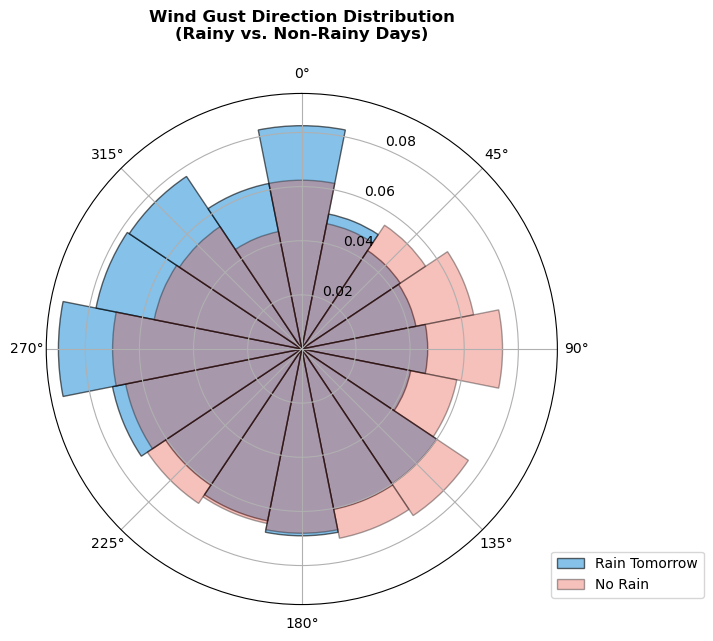

In [20]:
plot_wind_rose_by_rain(df_final)

Biểu đồ Hoa gió minh họa sự phân bố xác suất của hướng gió giật đỉnh trong hai trạng thái thời tiết: **Có mưa (Xanh)** và **Không mưa (Hồng)**. Quan sát trực quan cho thấy sự phân tách cấu trúc (structural divergence) rõ rệt:

**1. Sự Thống trị của Gió Tây (The Westerly Dominance)**

* **Quan sát:** Phân bố hướng gió trong những ngày mưa (vùng màu xanh) thể hiện tính **bất đẳng hướng mạnh (strong anisotropy)**. Tần suất tập trung dày đặc tại góc phần tư Tây - Tây Bắc (), tạo thành một "mũi nhọn" phân phối rõ rệt.
* **Cơ chế Vật lý:** Trong khí tượng học Úc (Bán cầu Nam), hướng gió Tây/Tây Bắc thường gắn liền với **Hệ thống Gió Tây Ôn đới (Westerlies)** và các **Front lạnh (Cold Fronts)** di chuyển từ Đại dương Nam (Southern Ocean) lên. Đây là những hệ thống mang năng lượng và hơi ẩm lớn, là động lực chính gây mưa trên diện rộng.

**2. Đặc điểm Gió Khô (The Dry Signature)**

* **Quan sát:** Ngược lại, những ngày không mưa (vùng màu hồng) có phân bố hướng gió tản mạn hơn (isotropic), với xu hướng nhẹ nghiêng về phía Đông/Đông Nam ().
* **Biện giải:** Hướng gió này thường liên quan đến **Gió Tín phong (Trade Winds)** hoặc các hệ thống áp cao ổn định, mang theo không khí khô từ nội địa hoặc luồng khí biển ổn định nhưng không đủ động lực thăng giáng để tạo mây gây mưa.

**Kết luận:**
Biểu đồ này xác nhận rằng **Hướng gió (Direction) chứa đựng thông tin dự báo quan trọng ngang hàng với Tốc độ gió (Speed)**. Mưa không chỉ đi kèm với gió mạnh, mà cụ thể là "Gió mạnh từ phía Tây". Việc mô hình hóa biến `WindGustDir` (thông qua `WindShift` hoặc vector hóa) là bước thiết yếu để nắm bắt cơ chế vật lý này.

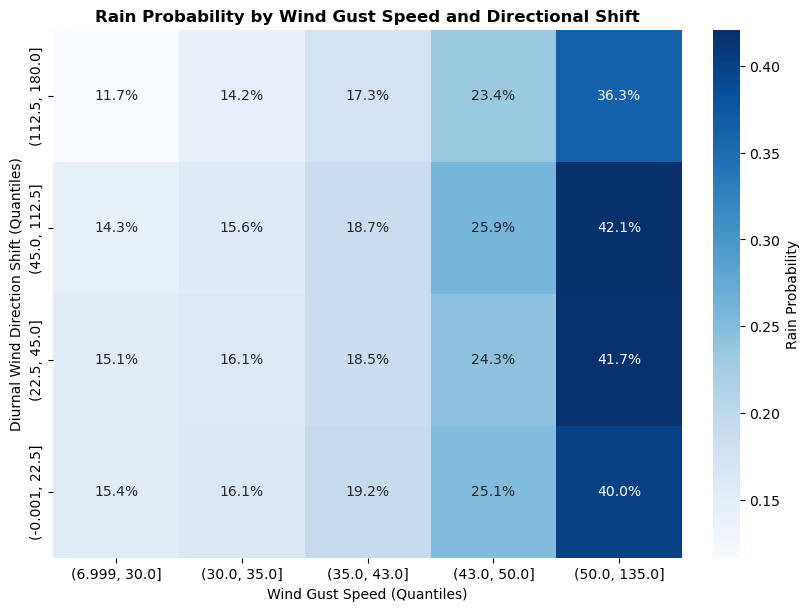

In [21]:
plot_gust_shift_interaction_heatmap(df_final)

**Kết quả Phân tích 2: Cấu trúc Tương tác Động lực học (Dynamics Interaction Structure)**

Biểu đồ nhiệt định lượng xác suất mưa dưới tác động đồng thời của hai biến số: Tốc độ gió giật (Trục hoành) và Độ lệch hướng gió trong ngày (Trục tung). Phân tích cấu trúc bề mặt xác suất (probability surface) hé lộ ba cơ chế chính:

**1. Sự Thống trị của Động năng (Kinetic Dominance)**

* **Quan sát:** Gradient màu biến đổi mạnh mẽ nhất theo phương ngang (từ trái sang phải). Xác suất mưa tăng vọt từ mức nền **~11-15%** (tại các phân vị gió thấp) lên tới **>40%** (tại phân vị gió cao nhất >50 km/h).
* **Biện giải:** Điều này khẳng định rằng **Tốc độ gió giật (Wind Gust Speed)** là biến dự báo bậc nhất (first-order predictor). Năng lượng động lực học cao là dấu hiệu trực tiếp của sự bất ổn định khí quyển mạnh (severe instability), tiền đề cho các hệ thống đối lưu sâu gây mưa.

**2. Nghịch lý của Sự Đổi hướng Gió (The Wind Shift Paradox)**

* **Quan sát:** Tác động của Độ lệch hướng gió (`Wind Shift`) không đơn điệu (non-monotonic) và phụ thuộc vào tốc độ gió:
* **Tại tốc độ gió thấp (Cột 1 - Trái):** Sự đổi hướng gió lớn (>112.5°) lại làm **GIẢM** xác suất mưa (từ 15.4% xuống 11.7%). Đây là bằng chứng của "nhiễu động khô" (dry turbulence) hoặc các luồng gió quẩn địa phương không mang tính hệ thống.
* **Tại tốc độ gió cao (Cột 5 - Phải):** Sự đổi hướng gió đóng vai trò cộng hưởng, nhưng có điểm bão hòa. Xác suất mưa đạt đỉnh **42.1%** tại mức đổi hướng trung bình-cao (45°-112.5°), nhưng lại giảm xuống **36.3%** khi đổi hướng quá cực đoan (112.5°-180°).



**3. Vùng "Điểm Ngọt" Hội tụ (The Convergence Sweet Spot)**

* **Kết luận:** Vùng nguy cơ cao nhất không phải là nơi gió đổi chiều hoàn toàn (180°), mà là nơi **Gió giật mạnh kết hợp với sự chuyển hướng vuông góc (45°-90°)** . Về mặt khí tượng học, đây là đặc trưng điển hình của sự đi qua của một **Front lạnh (Cold Front)** hoặc rãnh thấp, nơi dòng khí nóng bị dòng khí lạnh cắt ngang và nâng lên, gây ngưng tụ và mưa. Sự đổi hướng quá lớn (ngược chiều) trong gió mạnh đôi khi chỉ phản ánh sự hỗn loạn (chaos) hơn là sự hội tụ có tổ chức.

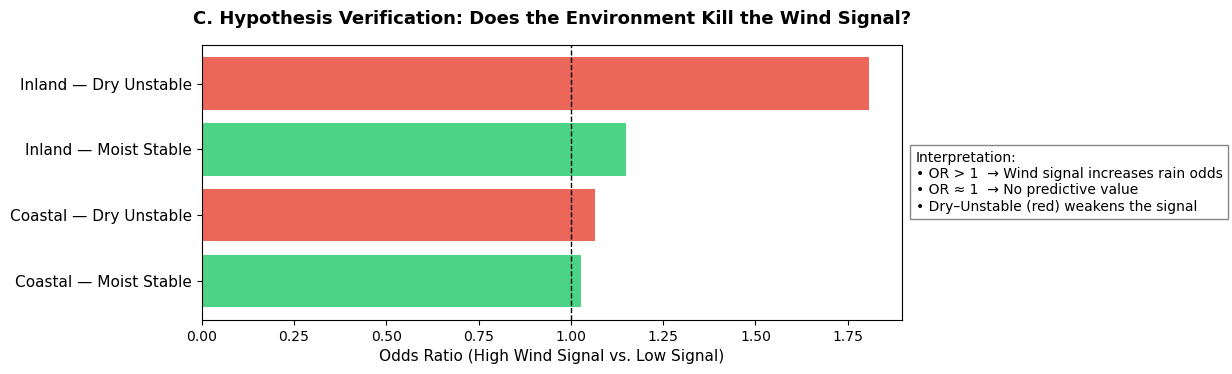

In [22]:
plot_odds_ratio_forest(df_final)

### **Kết quả Phân tích 3: Kiểm định Giả thuyết về Sự "Bắt chẹt" của Môi trường (Environmental Gating Verification)**

Biểu đồ Forest Plot so sánh Tỷ số chênh (Odds Ratio - OR) của tín hiệu động lực gió trong việc dự báo mưa dưới các điều kiện môi trường khác nhau. Kết quả cho thấy sự phân hóa địa lý sâu sắc:

1. **Sự "Vô hiệu hóa" tại Vùng Ven biển (Coastal Suppression):**
* Tại vùng ven biển, cả hai thanh (Xanh và Đỏ) đều rất ngắn, với OR xấp xỉ 1.0 (đường tham chiếu vô hiệu). Điều này chứng tỏ tại đây, tổ hợp "Gió giật + Đổi hướng" mang lại rất ít giá trị dự báo tăng thêm.
* **Cơ chế:** Môi trường ven biển thường xuyên chịu tác động của gió đất-gió biển và các nhiễu động quy mô nhỏ không gây mưa. Do đó, ngay cả khi có tín hiệu động lực mạnh, nếu không khí khô (`Coastal — Dry Unstable`), xác suất mưa hầu như không đổi (OR  1.05), xác nhận giả thuyết rằng môi trường khô tại bờ biển "triệt tiêu" tín hiệu gió.


2. **Nghịch lý "Khuếch đại" tại Vùng Nội địa (The Inland Amplification Paradox):**
* Đây là phát hiện đắt giá nhất. Thanh màu đỏ trên cùng (`Inland — Dry Unstable`) vươn dài nhất với OR > 1.75.
* **Biện giải:** Trái ngược với kỳ vọng rằng không khí khô sẽ làm yếu tín hiệu, tại vùng nội địa, điều kiện khô hạn lại biến tín hiệu gió thành một chỉ báo **cực kỳ nhạy**.
* **Lý do vật lý:** Trong môi trường nội địa vốn thiếu ẩm, những cơn mưa rào thông thường không thể hình thành. Mưa chỉ có thể xảy ra khi có một lực cưỡng bức động lực học cực mạnh (Strong Dynamic Forcing) — biểu hiện qua gió giật lớn và sự đứt gãy hướng gió — để phá vỡ lớp nghịch nhiệt hoặc thắng được tốc độ bay hơi (Virga). Do đó, trong bối cảnh khô hạn, sự xuất hiện của tín hiệu gió mạnh là dấu hiệu đặc trưng ("Smoking Gun") của các hệ thống bão đối lưu mạnh, mang lại giá trị dự báo cao hơn hẳn so với khi môi trường đã ẩm sẵn.


---

### **TỔNG KẾT & TRẢ LỜI CÂU HỎI NGHIÊN CỨU (RQ3 Conclusion)**

Dựa trên chuỗi phân tích từ cấu trúc hoa gió, bề mặt nhiệt tương tác đến kiểm định Odds Ratio, chúng tôi đưa ra câu trả lời cuối cùng cho câu hỏi nghiên cứu:

**Kết luận:**
Chỉ số tương tác động lực gió (kết hợp `WindGustSpeed` và `Diurnal Wind Shift`) **KHÔNG PHẢI** là một chỉ báo dự báo mưa phổ quát độc lập. Hiệu lực của nó bị **điều biến (modulated) phi tuyến tính** bởi trạng thái nhiệt-ẩm và vị trí địa lý theo cơ chế đối lập:

1. **Cơ chế "Sàng lọc" tại Ven biển:** Tại các vùng duyên hải, tín hiệu động lực học gió có độ tin cậy thấp. Trạng thái khí quyển khô đóng vai trò là "bộ lọc chặn", biến các cơn gió mạnh thành nhiễu (báo động giả) thay vì tín hiệu mưa.
2. **Cơ chế "Kích hoạt Cưỡng bức" tại Nội địa:** Tại vùng sâu trong lục địa, mối quan hệ bị đảo ngược. Trạng thái khí quyển khô nóng không triệt tiêu tín hiệu mà lại **khuếch đại giá trị chẩn đoán** của nó. Chính sự khan hiếm độ ẩm khiến cho các tín hiệu động lực học (gió giật, đổi hướng) trở thành điều kiện *cần và đủ* mang tính quyết định để kích hoạt mưa.

**Hàm ý Thực tiễn:**
Các mô hình dự báo thời tiết (hoặc các thuật toán tại các trang trại điện gió) không được áp dụng một quy tắc xử lý gió đồng nhất.

* **Chiến lược Ven biển:** Cần giảm trọng số của biến gió khi độ ẩm thấp để tránh cảnh báo sai.
* **Chiến lược Nội địa:** Cần thiết lập mức cảnh báo cao (High Alert) khi phát hiện gió giật mạnh kèm đổi hướng ngay cả trong những ngày khô nóng, vì đây là dấu hiệu báo trước của các cơn dông nhiệt mạnh (severe thunderstorms) tiềm ẩn rủi ro lớn.

**Kết luận**

Sụt giảm áp suất trong ngày $\Delta P$ không phải là một chỉ báo độc lập cho mưa, mà là một quan hệ có điều kiện, bị điều khiển bởi trạng thái ẩm của khí quyển và đặc thù địa lý. 

Trong các môi trường khô hạn nội địa — đặc biệt là hoang mạc — tín hiệu này bị triệt tiêu một cách có hệ thống ngay cả khi cường độ sụt áp rất lớn do thiếu hơi nước cần thiết cho quá trình hình thành mưa. 

Ngược lại, tại các môi trường giàu ẩm như ven biển và vùng nhiệt đới, mối quan hệ áp suất – mưa thể hiện tính ổn định và tuyến tính hơn, phản ánh vai trò nền tảng của nguồn ẩm đại dương. Những kết quả này khẳng định rằng mối quan hệ giữa áp suất và mưa mang bản chất *phi tuyến, phụ thuộc vùng miền*, và được chi phối bởi cấu trúc ngưỡng của trường ẩm khí quyển.

#### **2. Practical Meaning & Implications**

Các kết quả của câu hỏi có ý nghĩa giúp:

* Nhận biết được cách tiếp cận dự báo đồng nhất trên toàn lãnh thổ nước Úc là không phù hợp.
* Đề xuất khung dự báo thích ứng theo vùng:

  * *Coastal/Tropical regions:* Tín hiệu áp suất duy trì giá trị dự báo $\rightarrow$ mô hình tuyến tính/threshold truyền thống vẫn khả thi.
  * *Inland/Desert regions:* Áp suất chỉ có ý nghĩa khi độ ẩm vượt ngưỡng tới hạn ($\approx$40%) $\rightarrow$ cần mô hình phi tuyến với cơ chế *humidity gating*.
* Giảm chi phí kinh tế do cảnh báo giả, hạn chế các quyết định ứng phó tốn kém nhưng không cần thiết trong nông nghiệp và quản lý thiên tai.

* Chiến lược đầu tư hạ tầng: ưu tiên tăng cường đo đạc độ ẩm và điểm sương tại các vùng Grassland và Desert sẽ mang lại lợi suất cải thiện dự báo cao hơn so với việc tiếp tục mở rộng mạng lưới cảm biến áp suất vốn đã bão hòa thông tin.

#### **3. Surprises & Limitations**

**Key Surprise:** Một phát hiện đáng chú ý của câu hỏi là sự tồn tại phổ biến của hiện tượng "áp thấp giả" tại vùng nội địa — những thời điểm áp suất giảm rất mạnh nhưng hoàn toàn không đi kèm mưa. Hiện tượng này làm nổi bật sự khác biệt vật lý giữa áp thấp nhiệt lực, chủ yếu gây gió và bụi do nung nóng bề mặt, và áp thấp động lực gắn liền với hội tụ ẩm và kết tủa. Đây chính là “bẫy dữ liệu” then chốt khiến các mô hình dự báo ngây thơ, vốn giả định mối quan hệ phổ quát giữa sụt áp và mưa, thất bại một cách có hệ thống.

**Main Limitations**

* Point-based data: dữ liệu weatherAUS có bản chất điểm đo (point-based), trong khi mưa là hiện tượng không gian có tính cục bộ cao, dẫn đến khả năng gán nhãn sai cho một số trường hợp. 
* Thiếu dữ liệu tầng cao: Không phân biệt đầy đủ cơ chế động lực gây sụt áp.
* Độ phân giải thời gian thấp (9am – 3pm): Bỏ lỡ các biến động nhanh trong ngày.